<a href="https://colab.research.google.com/github/Ms-Noxolo/Team_EN3_Jozi/blob/master/Team_EN3_JHB_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team EN3 Unsupervised Learning predict

### Kaggle Submission: Team_EN3_

---


**Team Members:** Refiloe Phipa, Selebogo Mosoeu, Itumeleng Ngoetjana, Noxolo Kheswa, Jamie Japhta, Nkopane

**Supervisor :** Ebrahim Noormahomed

### Table of content
---
1.   [Introduction](#intro)
  *   Background
  *   Problem statement
---
2.   [Load Dependencies](#imports)
---
3.   [Data cleaning](#cleaning)
---
4.   [Data preprocessing](#preprocessing)
---
5.   [Exploratory Data Analysis](#EDA)
---
6.   [Modelling](#modelling)
---
7.   [Performance Evaluation](#evaluation)
---
8.   [Conclusion](#ending)
---
9.  [References](#ending)
















# 1. Introduction

### Background

In today’s technology driven world, recommender systems are socially and economically critical for ensuring that individuals can make appropriate choices surrounding the content they engage with on a daily basis. One application where this is especially true surrounds movie content recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

Recommender systems require a broad base access of the user's historical preferences as a result increasing the insights and the accuracy of its future predictions. We can implement an unsupervised machine learning algorithm to solve this problem.

Machine learning is the study of computer algorithms that improve automatically through experience. It is a powerful branch of Artificial intelligence, dating as far back as 1952. Machine learning algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to do so.

Unsupervised learning is a type of machine learning that looks for previously undetected patterns in a data set with no pre-existing labels and with a minimum of human supervision.


### Problem Statement

Build an unsupervised machine learning model that is capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences based on content or collaborative filtering.


# 2. Load Dependencies

In [4]:
# importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import math
import random
#from nltk.corpus import stopwords
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse.linalg import svds
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt 
import json
%matplotlib inline
import re
from wordcloud import WordCloud

#!pip install scikit-surprise
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from surprise import NormalPredictor
from surprise import SVDpp
from surprise import NMF

In [6]:
#from google.colab import files
#uploaded = files.upload()

In [8]:
# loading in the datasets
movies = pd.read_csv("data/movies.csv")
links = pd.read_csv('data/links.csv')
imdb = pd.read_csv('data/imdb_data.csv')
tags = pd.read_csv('data/tags.csv')
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
#scores = pd.read_csv('genome_scores.csv')
#Sample_Submission = pd.read_csv('sample_submission.csv')

# 3. Data Overview

Below we take a general review and summary of the datasets taking note of the shapes, info and features i.e. columns all of which will help us establish a good approach into performing the exploratory data analyses of the datasets.

In [9]:
# The movies
print(movies.shape)
movies.head()

(62423, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
# The links
print(links.shape)
links.head()

(62423, 3)


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


Given the similar shape of the movie and links i.e. movie homepage dataframes, we can already note that the links dataframe contains information relating to the movies file.

In [11]:
# The imdb
print(imdb.shape)
imdb.head()

(27278, 6)


,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


This dataframe consists of additional movie metadata scraped from IMDB using the links.csv file. These include cast/crew, budgets, plots as well as the runtime. The IMDB platform has its own movie-listing requirements therefore this could be the reason why the dataframe doesn't capture all the movies in the links.csv

In [12]:
# The tags 
print(tags.shape)
tags.head(2)

(1093360, 4)


,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256


In [ ]:
#print(scores.shape)
#scores.head(2)

We see that the scores and tags dataframes contain information about the movies which can be used ior included in creating a meatadata dataframe of the movies which can be very useful in building a suitable recommender systems.

In [14]:
# The training 
print(train.shape)
train.head()

(10000038, 4)


,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


It is not surpring that this dataframe has alomst 2x more entries than the movie dataset because an individual user can watch more than one movies and also provide ratings for a selection of various movies. This dataframe can also be taken as a ratings table.

In [15]:
# Creating a new dataframe from a subset of the train data 
ratings = train.copy()
ratings.tail()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [16]:
# Since we're considering the train as ratings, it is useful to check for missing values,
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [18]:
# as well as the datatype:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


There are no missing values in the dataframe and it consists of only numeric values. That's Good! However, we may need to use only a subset of the dataframe to build and train our models as it becomes impossible work with a huge dataset depending on one's computational power.


In [19]:
# Overview of the testing dataframe
print(test.shape)
test.head()

(5000019, 2)


,userId,movieId
0,1,2011
1,1,4144


This dataset that will be used in testing the algorithms build for constructing recommender systems.

# 4. Data preprocessing

Data preprocessing is the process of detecting and correcting corrupt or inaccurate records from the dataset and identifying incomplete, incorrect, inaccurate or irrelevant parts of the data.

In [21]:
users = len(ratings.userId.unique())
items = len(ratings.movieId.unique())
print('There are {} unique users and {} unique movies in this data set'.format(users, items))

There are 162541 unique users and 48213 unique movies in this data set


In [23]:
max_userId = ratings.userId.max()
max_itemId = ratings.movieId.max()
print('There are {} distinct users and the max of user ID is also {}'.format(users, max_userId))
print('There are {} distinct movies, however, the max of movie ID is {}'.format(items, max_itemId))

There are 162541 distinct users and the max of user ID is also 162541
There are 48213 distinct movies, however, the max of movie ID is 209171


For matrix factorization, a item vector that is in unnecessarily high dimensional space requires data cleaning to reduce the dimension of item vector back to the number of items i.e.Movies

In [24]:
def reduce_item_dim(df_ratings):
    """
    Reduce item vector dimension to the number of distinct items in our data sets
    
    input: pd.DataFrame, df_ratings should have columns ['userId', 'movieId', 'rating']
    output: pd.DataFrame, df_ratings with new 'MovieID' that is compressed
    """
    # pivot
    df_user_item = df_ratings.pivot(index='userId', columns='movieId', values='rating')
    # reset movieId
    df_user_item = df_user_item.T.reset_index(drop=True).T
    # undo pivot/melt - compress data frame
    df_ratings_new = df_user_item \
        .reset_index('userId') \
        .melt(
            id_vars='userId', 
            value_vars=df_user_item.columns,
            var_name='movieId',
            value_name='rating')
    # drop nan and final clean up
    return df_ratings_new.dropna().sort_values(['userId', 'movieId']).reset_index(drop=True)

In [25]:
print('reduce item dimension before:')
ratings.head()

reduce item dimension before:


,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [27]:
new_ratings = reduce_item_dim(ratings.copy()[:100])
print('reduce item dimension after:')
new_ratings.head()

reduce item dimension after:


,userId,movieId,rating
0,5163,81,4.0
1,6063,73,3.0
2,9041,8,3.0
3,9512,7,4.0
4,11932,78,3.0


An alternative Filtering and cleaning method:

In [28]:
# Limiting the ratings to user ratings that have rated more that 25 movies:
ratings_f = ratings.groupby('userId').filter(lambda x: len(x) >= 25)

# Creating a list with movie titles that survived the filtering:
movie_list_rating = ratings_f.movieId.unique().tolist()

In [29]:
# The prop of the original movie titles in ratings data frame that we have retained:
len(ratings_f.movieId.unique())/len(movies.movieId.unique()) * 100

76.82104352562357

In [30]:
# The prop of the users in ratings data frame that we have retained:
len(ratings_f.userId.unique())/len(ratings.userId.unique()) * 100

55.149777594576136

Choosing the users who rated more than 25 items and the items that have more than 25 ratings helps sure that that we remain within the confines of the memory limitation in our machine. However, we did keep the dataset as it when working on cloud i.e. Kaggle, AWS EC2 instance. So now that we have somemwhat finalized the size and type of dataset we will be building and training models with, we can continue with cleaning the data some more.

In [31]:
# Using the results to filter the movies data frame:
movies = movies[movies.movieId.isin(movie_list_rating)]

In [32]:
# Storing the years from the titles separately:

# We specify the parantheses so we don’t conflict with movies that have years in their titles
movies["year"] = movies.title.str.extract("(\(\d\d\d\d\))",expand=False)
# Removing the parentheses
movies["year"] = movies.year.str.extract("(\d\d\d\d)",expand=False)
# Removing the years from the ‘title’ column
movies["title"] = movies.title.str.replace("(\(\d\d\d\d\))", "")
# Applying the strip function to get rid of any ending whitespace characters that may have appeared
movies["title"] = movies["title"].apply(lambda x: x.strip())

In [33]:
# Removing the character separating the genres for each movie
movies['genres'] = movies['genres'].str.replace('|',' ')

# Removing the same character for the meatadata:
imdb['title_cast'] = imdb['title_cast'].str.replace('|',' ')
imdb['plot_keywords'] = imdb['plot_keywords'].str.replace('|',' ')

In [34]:
# Viewing the dataframes: Movies
movies.head(3)

,movieId,title,genres,year
0,1,Toy Story,Adventure Animation Children Comedy Fantasy,1995
1,2,Jumanji,Adventure Children Fantasy,1995
2,3,Grumpier Old Men,Comedy Romance,1995


In [35]:
# map movie to id:
Mapping_file = dict(zip(movies.title.tolist(), movies.movieId.tolist()))

In [36]:
# Viewing the dataframes: imdb
imdb.head(3)

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks Tim Allen Don Rickles Jim Varney Wal...,John Lasseter,81.0,"$30,000,000",toy rivalry cowboy cgi animation
1,2,Robin Williams Jonathan Hyde Kirsten Dunst Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game adventurer fight game
2,3,Walter Matthau Jack Lemmon Sophia Loren Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat lake neighbor rivalry


In [37]:
# Dropping the timestamps as they are considered not useful since we have runtime data
tags.drop(['timestamp'],1, inplace=True)
ratings_f.drop(['timestamp'],1, inplace=True)

Merging the movies and the tags dataframes and creating a metadata tag for each movie

In [38]:
# creating the mixed dataframe of movies title, genres and all user tags given to each movie
mixed = pd.merge(movies, tags, on='movieId', how='left')
mixed.head(3)

,movieId,title,genres,year,userId,tag
0,1,Toy Story,Adventure Animation Children Comedy Fantasy,1995,791.0,Owned
1,1,Toy Story,Adventure Animation Children Comedy Fantasy,1995,1048.0,imdb top 250
2,1,Toy Story,Adventure Animation Children Comedy Fantasy,1995,1361.0,Pixar


In [39]:
print(mixed.shape)

(1075548, 6)


Cleaning this newly created metadata:

In [40]:
# Creating metadata from tags and genres
mixed.fillna("", inplace=True)
mixed = pd.DataFrame(mixed.groupby('movieId')['tag'].apply(
                                          lambda x: "%s" % ' '.join(x)))
Final = pd.merge(movies, mixed, on='movieId', how='left')
Final ['metadata'] = Final[['tag', 'genres']].apply(
                                          lambda x: ' '.join(x), axis = 1)
Final[['movieId','title','metadata']].head(3)

,movieId,title,metadata
0,1,Toy Story,Owned imdb top 250 Pixar Pixar time travel chi...
1,2,Jumanji,Robin Williams time travel fantasy based on ch...
2,3,Grumpier Old Men,funny best friend duringcreditsstinger fishing...


Now we have created a new dataframe that will come in handy later when we tackle content-nased filering. Fow now, we proceed with some insight extractions.

# 5. Exploratory Data Analysis

We need to perform investigative and detective analysis on our data to see if we can unearth any useful insights. We have data being generated from websites so it’s important to utilize Exploratory Data Analysis to analyze all this text data, with the aid of Visuals to help organizations make data-driven decisions.




### The number of movies being released
Knowing the numbers around movies can help paint a picture of the relationship that exists between movies and 'users' as availability of movies can be play a huge role in the general growth of the movie-audience industry.

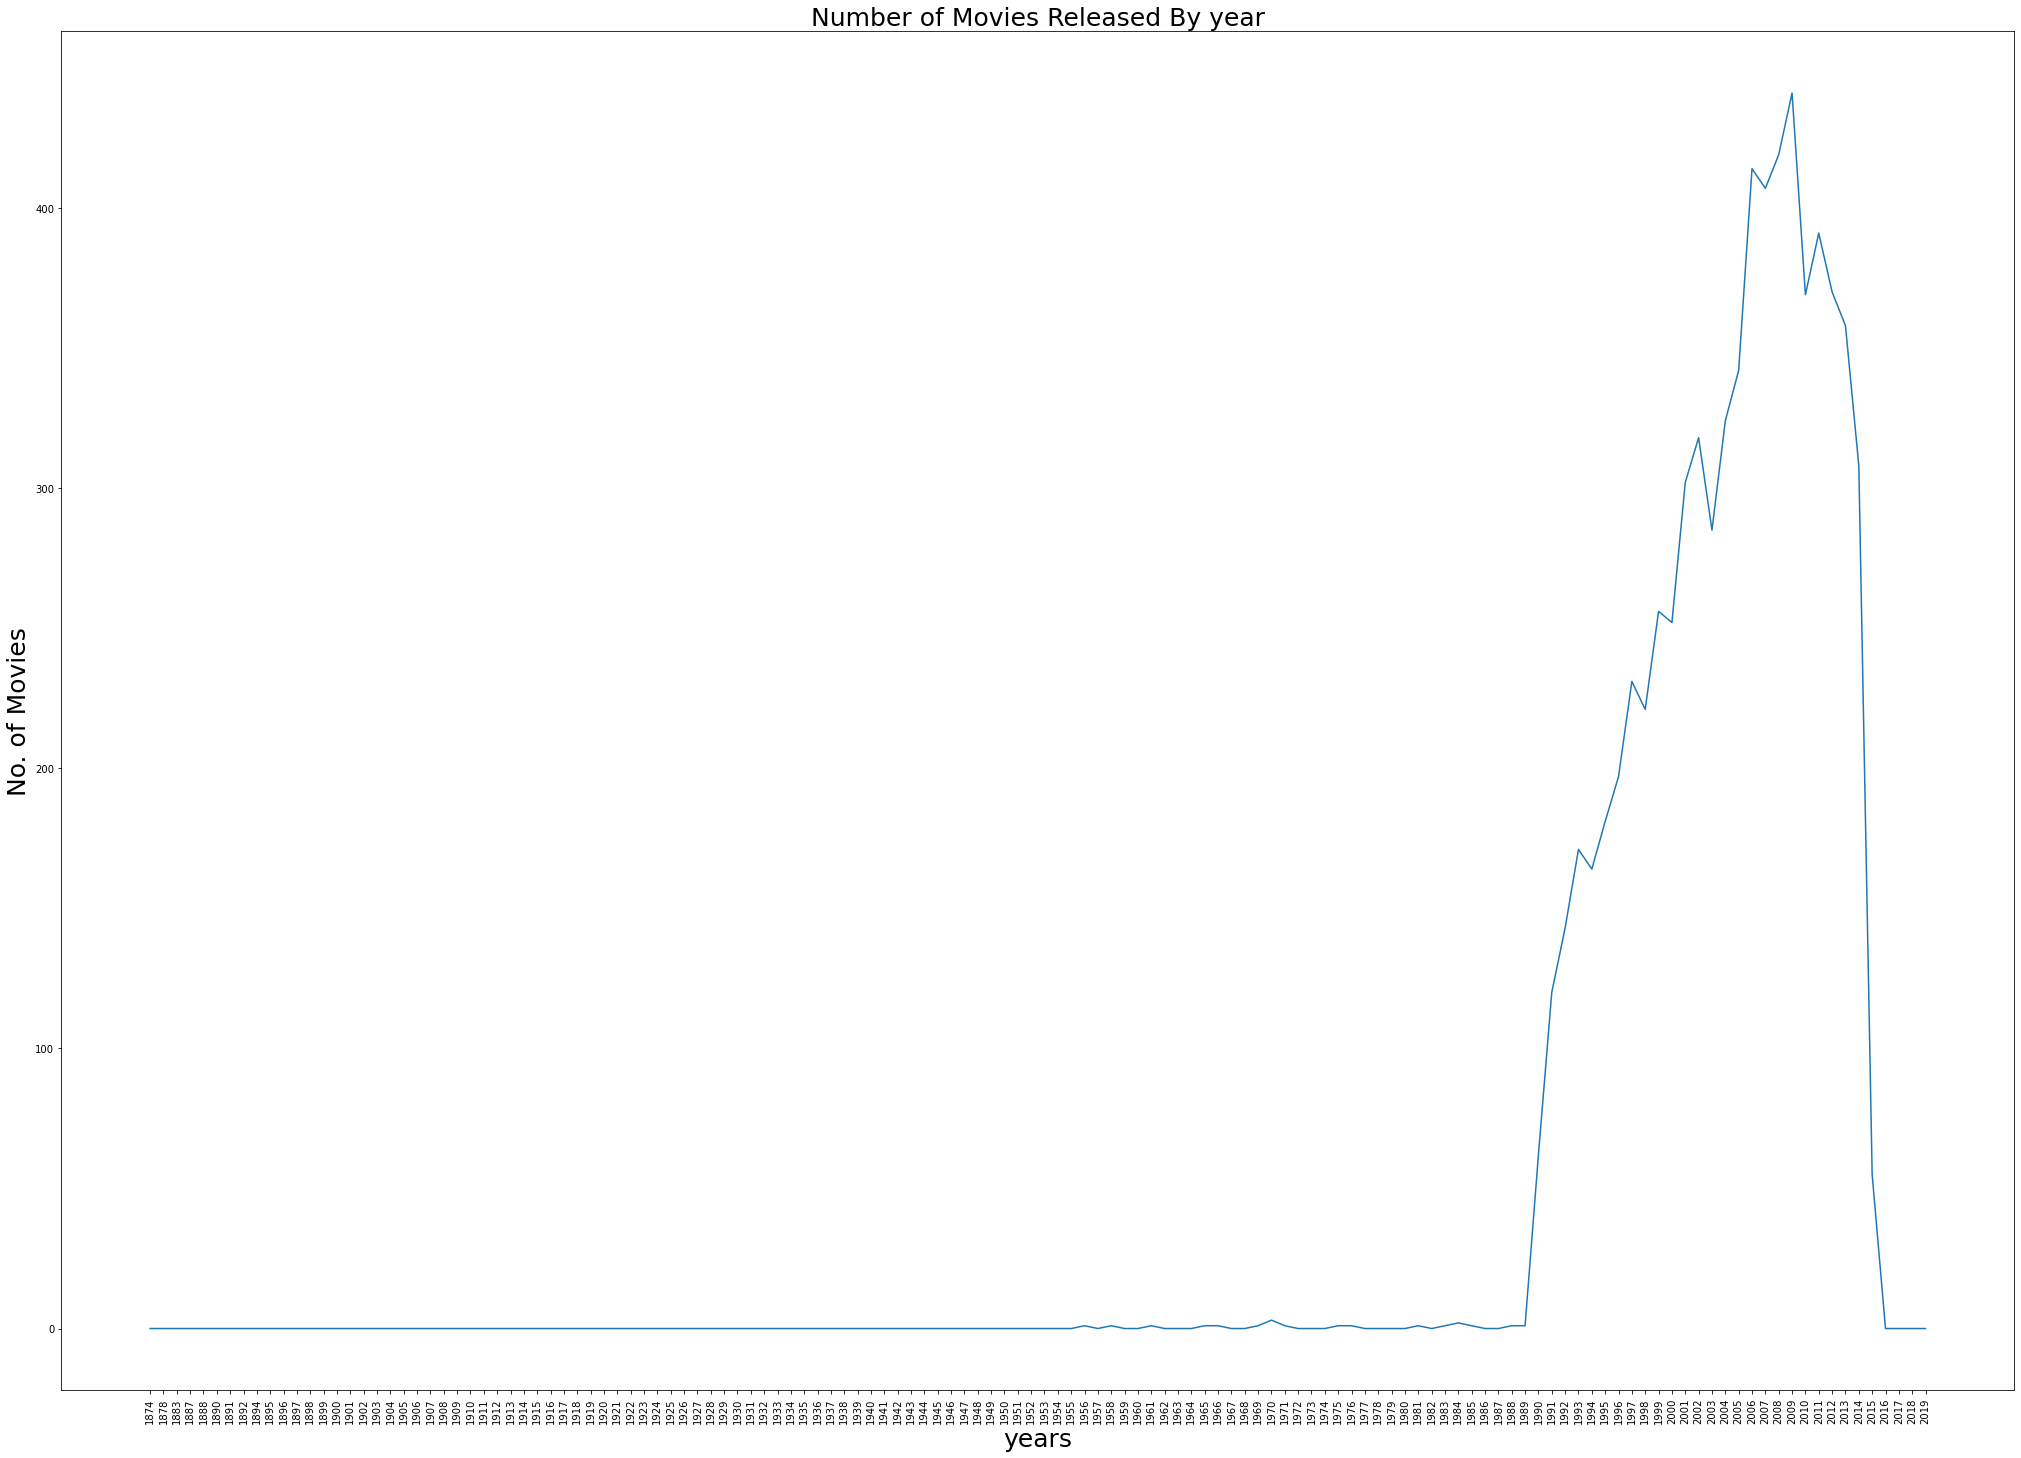

In [41]:
metadata = pd.merge(movies, imdb, on='movieId', how='left')
# The number of Movies released per year
num = metadata.groupby('year').count()
plt.figure(figsize=(35,25))
plt.plot(num.index, num['budget'])
plt.xlabel("years", size=25)
plt.xticks(rotation='vertical')
plt.ylabel('No. of Movies', size=25)
plt.title('Number of Movies Released By year', size=25)
plt.show()

Although there has been some drops in the number of movies released throughout the years, it is clear to see that there generally has been a significant growth in movies being released with the growth being exponential around 1990s.

### The number of ratings for the movies released
The general distribution of the ratings

In [ ]:
# Plotting the distribution
ratings[:20000].plot(kind='bar')
plt.ylabel('count')
plt.xlabel('movie rating')
plt.title('Count of movies by ratings')
plt.show()

There are more movies with ratings of 4.0, followed by 3.0, then 5.0. The issue here is that a movie may have been watched by one user and they might have given it a rating of 5.0. To curb this issue, there might be a need to consider only a movie whereby there we only 100 or more users who have watched the movie.

In [ ]:
# Evaluating the number of ratings a movie has received:
plt.figure(figsize=(8,5))
ratings_f.plot(kind='bar')
plt.ylabel('count')
plt.xlabel('movie rating')
plt.title('Count of movies with 25 or more viewers by ratings');

There are still more movies with ratings of 4.0, followed by 3.0, then 5.0, with 0.5 and 1.5 ratings being the lowest as well.

In [ ]:
# The average rating of movies in the database
avg_rating = ratings_f.groupby('movieId')['rating'].mean()

# Plotting the results
plt.figure(figsize=(8,5))
avg_rating.plot(kind='hist')
plt.ylabel('frequency')
plt.xlabel('movie rating')
plt.title('Average ratings of movies with 100 or more viewers');

Unsuprisingly, there is a high distribution of movies in the region of 3.0 to 4.0 ratings. We now move on to wordcloud to visually summarise some of the insights we have extracted from the datasets.

### The years with majority of movies being released
Now we want to find out which years are dominating the movie industry.

In [ ]:
# Looking at the all the years of movies releases
year_corpus = metadata['year'].value_counts()
# Generating the wordcolud
year_wordcloud = WordCloud(background_color='white', height=2000, width=4000).generate_from_frequencies(year_corpus)
plt.figure(figsize=(16,8))
plt.imshow(year_wordcloud)
plt.axis('off')
plt.show()

We can see that the wordcloud is correspodning with the plot above that the movie industry grew exponentially in the 2000s, with 2015 and 2016 being the most frequent yeas of movie releases.

### The kind of movies that are being released
Now we want to find out which movies, in terms of genre are dominating the movie industry.

In [ ]:
# Looking at the titles and checking for any similarity
metadata['genres'] = metadata['genres'].astype('str')
genre_corpus = ' '.join(metadata['genres'])
#Generating the stopwords
stopword = ['no genres', 'no', 'genres', 'genre', 'listed']
# Generating the wordcolud
genre_wordcloud = WordCloud(stopwords=stopword, background_color='white', height=2000, width=4000).generate(genre_corpus)
plt.figure(figsize=(16,8))
plt.imshow(genre_wordcloud)
plt.axis('off')
plt.show()

We can see that majority of the movies in the dataset are Comedy, Drama and Romance.

In [ ]:
# Looking at the titles and checking for any similarity
metadata['title'] = metadata['title'].astype('str')
title_corpus = ' '.join(metadata['title'])
# Generating the wordcolud
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

As the worldcloud suggests, there are a lot of movies that pertain tell the stories of a boy and/or girl, movies about wars, crime, America and sequels as indicated by "II". These correspond to the genres unpacked above.

The dataset consists of 27248 movies for which we have data on overview, cast/crew and budget. This is close to only 44% of the entire dataset. Although this is less than 505 of the entire dataset, it is more than enough to perform very useful analysis and discover interesting insights about the world of movies as these play a role in profiling a user.

In [ ]:
# Looking at the plots and checking for any similarity
metadata['plot_keywords'] = metadata['plot_keywords'].astype('str')
overview_corpus = ' '.join(metadata['plot_keywords'])
# Generating the wordcolud
plot_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(plot_wordcloud)
plt.axis('off')
plt.show()

### The runtime of movies that are being released
Movies have progressed in terms of runtime, From the 1 minute slient, black & white clips to epic 3 hour gci. So, in this section, let us try and gain some additional insights about the nature of movie lengths and their evolution over time.

Now we want to find out the duration of these movies being released are.

In [ ]:
# converting the column to numeric
metadata['runtime'] = pd.to_numeric(metadata['runtime'])

# Viewing relative durations of the movies
metadata['runtime'].describe()


This is only a subset of the dataset i.e. 22%, and from this wee can see that the average length of a movie is about 1 hour and 40 minutes. The longest movie recorded in this dataset is 877 minutes (or 14 hours) long.

In [ ]:
# The distribution of these mainstream movies .i.e movies less than 3 hours (or 200 minutes) long. 
plt.figure(figsize=(12,6))
sns.distplot(metadata[(metadata['runtime'] < 200) & (metadata['runtime'] > 0)]['runtime'])

Possible trends in what may be considered as the appropriate length of a movie across the years.

In [ ]:
# Looking at the shortest Movies
metadata[metadata['runtime'] > 0][['runtime', 'title', 'year']].sort_values('runtime').head(10)

Majority of the short movies were filmed in the late 1890s and the beginning of the 20th century and they're absurdly only a minute long. The exceptn in the Top 10 are Fresh Guacamole released in 2012 and Curb Dance released in 2010 both being two minutes long.

In [ ]:
# Looking at the longest Movies
metadata[metadata['runtime'] > 0][['runtime', 'title', 'year']].sort_values('runtime', ascending=False).head(10)

Notably, almost all the entries in the above list were released in the 2000s and are actually miniseries and sequels and as such, can't count as feature length films. There isn't much insight we can gther from this as there is no way of distinguishing feature length films from TV Mini Series from our dataset unless done manually, and this could take days.

# 6. Modelling

Two of the most popular ways to approach recommender systems are _collaborative filtering_ and _content-based_ recommendations.

### Suprise
Surprise is a Python scikit building and analyzing recommender systems that deal with explicit rating data. We will be using it to develop and train our recommender models.

### Collaborative Filtering

A technique that can filter out items that a user might like on the basis of reactions by similar users.

It works by searching for a group of people with similar taste to this specific users using matrices.
The idea behind matrix factorization is to represent users and items in a lower dimensional latent space. It is then used as a method to predict a rating for a user item pair based on the history of ratings given by the user and given to the item.

In [ ]:
# Creating a content latent matrix from movie metadata:
# using tf-idf vectors and truncated SVD :
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(Final['metadata'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=Final.index.tolist())
print(tfidf_df.shape)

Do the first 200 components explain over 50% of the variance within the data?:

In [ ]:
# Compressing with SVD
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=200)
latent_matrix = svd.fit_transform(tfidf_df)

# Plotting the variance expalined to see what latent dimensions to use:
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms = 16, color='red')
plt.xlabel('Singular value components', fontsize= 12)
plt.ylabel('Cumulative percent of variance', fontsize=12)        
plt.show()

In [ ]:
# Keeping 200 latent dimensions: 
n = 200 
latent_matrix_1_df = pd.DataFrame(latent_matrix[:,0:n], index=Final.title.tolist())

# our content latent matrix:
latent_matrix.shape

In [ ]:
# Creating a collaborative latent matrix from user ratings: 
# We use only a subset of the data to make it possible to pivot the rating dataframe
ratings_f = ratings[:3000000]
ratings_f1 = pd.merge(movies[['movieId']], ratings_f, on="movieId", how="right")

ratings_f2 = ratings_f1.pivot(index = 'movieId', columns ='userId', values = 'rating').fillna(0)
ratings_f2.head(3)

In [ ]:
# Using the same number of dimensions as before
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=200)
latent_matrix_2 = svd.fit_transform(ratings_f2)
latent_matrix_2_df = pd.DataFrame(
                             latent_matrix_2,
                             index=Final.title.tolist())

In [ ]:
# Plotting the variance expalined to see what latent dimensions to use
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms = 16, color='red')
plt.xlabel('Singular value components', fontsize= 12)
plt.ylabel('Cumulative percent of variance', fontsize=12)        
plt.show()

### Content Based Filtering

A Content based filter uses attributes to recommend similar content.

In a content-based recommender system, keywords are used to describe the items and a user profile is built to indicate the type of item this user likes. In other words, these algorithms try to recommend items that are similar to those that a user liked in the past.

In [3]:
from google.colab import files
uploaded = files.upload()

Saving imdb_data.csv to imdb_data (3).csv
Saving movies.csv to movies (2).csv


In [6]:
#In order to best recommend a movie, we need to look at the list of movies we have. 
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
#movies = pd.read_csv('movies.csv')
#imdb = pd.read_csv('imdb_data.csv')

Other features that could help or influence what a user may like include the cast, director or keywords.
- This data can all be found in the imdb dataset.

In [7]:
imdb.head(3)

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


The Combined relevant datasets

The movie database has movie titles and genres and the imdb database has the cast, directors and keywords.
We make it easier to view all of this information by combining them into one dataset.  

In [8]:
alls = metadata.copy()
alls.head(3)

,movieId,title,genres,title_cast,director,runtime,budget,plot_keywords
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Jumanji (1995),Adventure|Children|Fantasy,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Grumpier Old Men (1995),Comedy|Romance,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Father of the Bride Part II (1995),Comedy,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [9]:
# Checking for null values
alls.isna().sum()

movieId              0
title                0
genres               0
title_cast        9665
director          9519
runtime          11345
budget           17583
plot_keywords    10482
dtype: int64

In [10]:
# Replac the null values.
alls['title_cast'] = alls['title_cast'].fillna('')
alls['director'] = alls['director'].fillna('')
alls['plot_keywords'] = alls['plot_keywords'].fillna('')
alls.isna().sum()

movieId              0
title                0
genres               0
title_cast           0
director             0
runtime          11345
budget           17583
plot_keywords        0
dtype: int64

We obeserve that both _Runtime_ and _budget_ do not really influence a user's choice in movie preferences so we drop it these columns rather than impute them.

In [12]:
# Dropping columns that are not useful
alls = alls.drop(['runtime', 'budget'], axis = 1)
alls = alls.drop('movieId', axis = 1)

In [13]:
# Checking for missing values
alls.isna().sum()

title            0
genres           0
title_cast       0
director         0
plot_keywords    0
dtype: int64

The dataframe is now cleaned so we move on to convert the data to lowercase and remove any spaces to ensure our system does not confuse names or movies that may start with the same first words.
eg 'James Bond' and 'James Carter' may come across as the same character.

In [22]:
# Creating a function to clean the metadata
def clean(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [23]:
# Applying the cleaning function
for items in alls:
    alls[items] = alls[items].apply(clean)

# Looking at the cleaned dataframe
alls.head(3)

Now that we have clean the relevant data, we create our metadata soup that will be used in vectorizing. 

In [25]:
# This function generates normlized text values that will be easy to vectorize
def soup(x):
    return ' '.join(x['genres']) + ' ' + ' '.join(x['title_cast']) + ' ' + x['director'] + ' ' + ' '.join(x['plot_keywords'])
alls['soup'] = alls.apply(soup, axis=1)

In [26]:
# We then _reset the index_ so as to generate a new dataframe setting the indices in order, 
# starting from 0, making it easier to work with the dataframe.
alls = alls.reset_index()
indices = pd.Series(alls.index, index=alls['title'])

CountVectorizer counts the word frequencies, unlike the TFIDFVectorizer we have used before in which the value increases proportionally to count, but is inversely proportional to frequency of the word in the corpus; that is the inverse document frequency (IDF) part.

CountVectorizer thus provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words. Also enabling the preprocessing of text data prior to generating the vector representation making it a highly flexible feature representation module for text.

In [27]:
# Creating the instance of cv
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(alls['soup'])

### Cosine Similarity

A metric used to determine how similar the data is. It measures similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. It is different to the latent matrix whereby the user and item vectors are often called latent vectors are low-dimensional embeddings. 

In [ ]:
# Creating the instance of csine similarity
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [ ]:
# This function considers all our relevant features along with the cosine similarity 
# then returns a list of recommended movies. 
def reco(title, cosine_sim = cosine_sim):
    
    index = indices[title]

    sim_scores = list(enumerate(cosine_sim[index]))
    sims = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sims = sims[1:11]

    movie_indices = [i[0] for i in sims]

    # Return the top 10 most similar movies
    return alls['title'].iloc[movie_indices]

Finally we are now able to suggest a movie and find other similar movies for our user to watch.

### Hybrid cosine Similarity

#) Running a content / collaborative and hybrid cosine Similarity:
from sklearn.metrics.pairwise import cosine_similarity
#) We  the latent vectors for a selected movie from both content and collaborative matrixes:
a_1 = np.array(latent_matrix_1_df.loc['Toy Story']).reshape(1, -1)
a_2 = np.array(latent_matrix_2_df.loc['Toy Story']).reshape(1, -1)

#) Then calculate the similartity of this movie with the others in the list:
score_1 = cosine_similarity(latent_matrix_1_df, a_1).reshape(-1)
score_2 = cosine_similarity(latent_matrix_2_df, a_2).reshape(-1)

#) Find an average measure of both content and collaborative: 
hybrid = ((score_1 + score_2)/2.0)

#) Finally formulate a data frame of similar movies:
dictDf = {'content': score_1 , 'collaborative': score_2, 'hybrid': hybrid} 
similar = pd.DataFrame(dictDf, index = latent_matrix_1_df.index )

#) Sort the dataframe on the basis of either: content, collaborative or hybrid,  i.e content
similar.sort_values('content', ascending=False, inplace=True)

similar[1:].head(11)

### Surprise
cont.

Basic algorithms used in recommender systems:

- NormalPredictor: predicts a random rating based on the distribution of the training set, which is assumed to be normal.
- BaselineOnly: predicts the baseline estimate for given user and item.
- KNNBasic: a basic collaborative filtering algorithm.
- KNNWithMeans: a basic collaborative filtering algorithm, taking into account the mean ratings of each user.
- KNNBaseline: is a basic collaborative filtering algorithm taking into account a baseline rating.
- SVD algorithm is equivalent to Probabilistic Matrix Factorization
- SVDpp algorithm is an extension of SVD that takes into account implicit ratings.
- NMF is a collaborative filtering algorithm based on Non-negative Matrix Factorization. It is very similar with SVD.

In [ ]:
from surprise import SVD, SVDpp, NormalPredictor, KNNBasic, BaselineOnly
# Benchmarking algorithms
models = ['SVD', 'SVDpp', 'NormalPredictor', 'KNNBasic', 'BaselineOnly']
performance = [] # empty list to capture rmse

In [ ]:
# Creating data to benchmark on:
data = Dataset.load_from_df(train_df, reader=reader)
trainset, testset = train_test_split(data, test_size=0.25, random_state=42)

for model in [SVD, SVDpp, NormalPredictor, KNNBasic, BaselineOnly]:
    
    # Create an instance of the model
    algo = model()
    # Fit the model to the training data
    algo.fit(trainset)
    # Generate predictions
    predictions = algo.test(testset)
    # Compare predictions against actuals
    rating_pred = accuracy.rmse(predictions)
    # Extract only the name of the model
    performance.append(rating_pred)

In [ ]:
# Creating a dataframe to store the rmse results of the models
results = pd.DataFrame(data=performance, columns=['rmse'], index=models)
# Sorting the results from best performance to worst
results.sort_values('rmse', inplace=True)
results

SVD

The Singular Value Decomposition (SVD), is a matrix factorisation technique, which reduces the number of features of a dataset by reducing the space dimension from N-dimension to K-dimension (where K < N), it is of no suprise that it and the SVDpp performed best out of the other models. Since SVD and SVDpp had the least RMSE value, we will tune the hyper-parameters of them.

In [ ]:
# Tuning algorithm parameters with GridSearchCV to find the best parameters for the algorithm.
# Using a subset of the data so that it runs quicker:
ratings = ratings[:50000]
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId' ,'movieId', 'rating']], reader)

from surprise.model_selection.search import GridSearchCV
param_grid = {'n_factors': [25, 30, 35, 40, 100], 'n_epochs': [15, 20, 25], 'lr_all': [0.001, 0.003, 0.005, 0.008],               'reg_all': [0.08, 0.1, 0.15, 0.02]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)
algo = gs.best_estimator['rmse']
print(gs.best_score['rmse']) 
print(gs.best_params['rmse'])

# Assigning the values
best = gs.best_params 
factors = best['rmse']['n_factors']
epochs = best['rmse']['n_epochs'] 
lr_value = best['rmse']['lr_all']
reg_value = best['rmse']['reg_all']

Now we train our dataset and arrive at a prediction.

In [ ]:
reader = Reader()
train = Dataset.load_from_df(train[['userId', 'movieId', 'rating']], reader)
svd = SVD(factors, epochs, lr_value, reg_value)
data_train = train.build_full_trainset()
svd.fit(data_train)

Breakdown of what is put into the model:


* a = userId
* b = movieId
* c = rating
* d = expected rating

In [ ]:
a = 
b =
c =

In [ ]:
d = svd.predict(a, b, c)
print (d)

For our prediction, we give the model a different users info (userId, movieId and their rating). It will then predict an estimate of what our user may rate this movie.

## 7. Performance Evaluation

## 8. Conclusion

## 9. References

1. Beginner Tutorial: Recommender Systems in Python
https://www.datacamp.com/community/tutorials/recommender-systems-python

2. Building Recommender Systems with Machine Learning and AI
https://explore.udemy.com/course/building-recommender-systems-with-machine-learning-and-ai/learn/lecture/18187952#overview

3. Build a Recommendation Engine With Collaborative Filtering
https://realpython.com/build-recommendation-engine-collaborative-filtering/

4. How to Build Simple Recommender Systems in Python
https://medium.com/swlh/how-to-build-simple-recommender-systems-in-python-647e5bcd78bd

5. Introduction to Recommendation System. Part 1
https://hackernoon.com/introduction-to-recommender-system-part-1-collaborative-filtering-singular-value-decomposition-44c9659c5e75

6. Building a Recommender System With Pandas
https://medium.com/towards-artificial-intelligence/building-a-recommender-system-with-pandas-1ca0bb03fdce

7. Building and Testing Recommender Systems With Surprise, Step-By-Step
https://towardsdatascience.com/building-and-testing-recommender-systems-with-surprise-step-by-step-d4ba702ef80b

8. Prototyping a Recommender System Step by Step Part 1: KNN Item-Based Collaborative Filtering
https://towardsdatascience.com/prototyping-a-recommender-system-step-by-step-part-1-knn-item-based-collaborative-filtering-637969614ea

9. Suprise
http://surpriselib.com/